In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm

In [3]:
house_df = pd.read_csv('train.csv')
house_df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [10]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [11]:
object_columns = house_df.select_dtypes(['object']).columns
print(object_columns)

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


In [12]:
numeric_columns = house_df.select_dtypes(['int64','float64']).columns
print(numeric_columns)

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


In [14]:
total_missing = house_df.isnull().sum().sort_values(ascending=False)
percent_missing = (house_df.isnull().sum()/house_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_missing, percent_missing], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


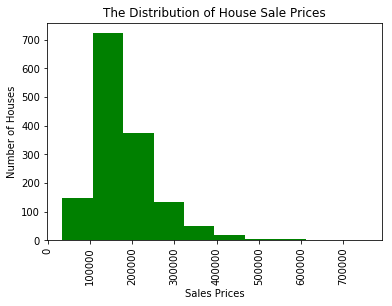

In [26]:
plt.hist(house_df.SalePrice, color="green")
plt.title("The Distribution of House Sale Prices")
plt.xlabel("Sales Prices")
plt.ylabel("Number of Houses")
plt.xticks(rotation='vertical')
plt.show()

In [15]:
np.abs(house_df[numeric_columns].iloc[:,1:].corr().loc[:,"SalePrice"]).sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
KitchenAbvGr     0.135907
EnclosedPorch    0.128578
ScreenPorch      0.111447
PoolArea         0.092404
MSSubClass       0.084284
OverallCond      0.077856
MoSold           0.046432
3SsnPorch        0.044584
YrSold           0.028923
LowQualFinSF     0.025606
MiscVal          0.021190
BsmtHalfBath     0.016844
BsmtFinSF2       0.011378
Name: SalePrice, dtype: float64

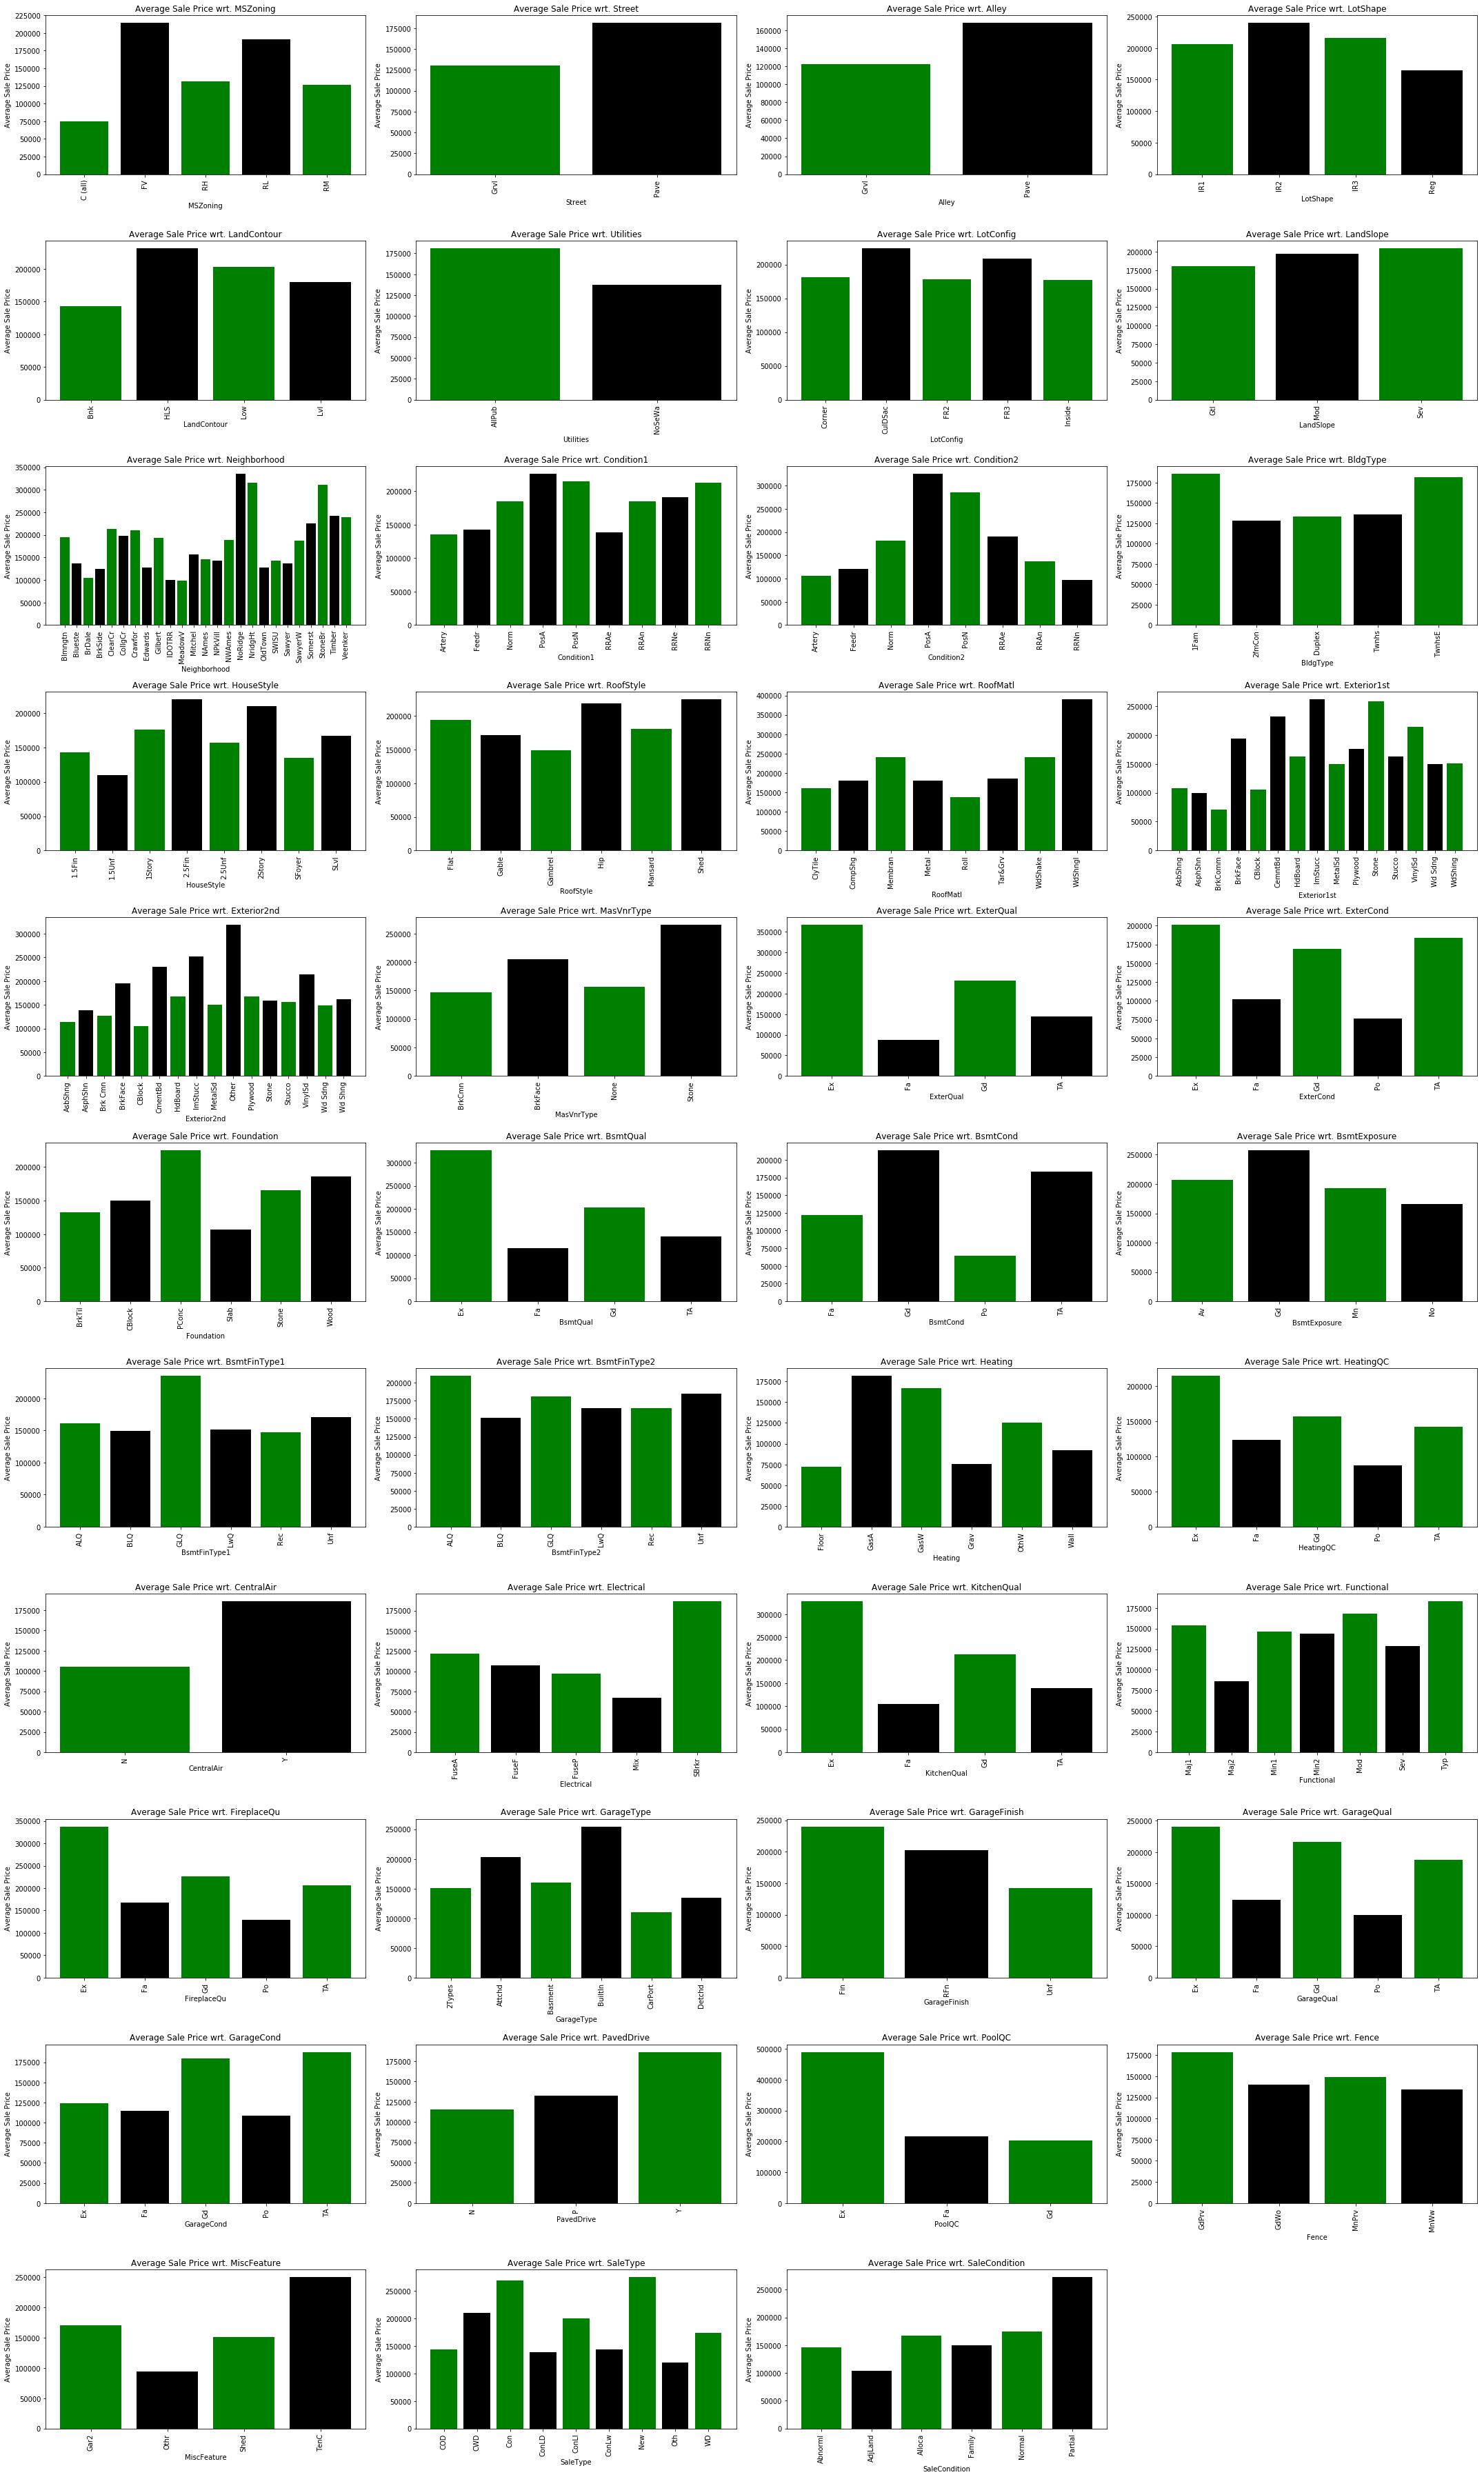

In [20]:
plt.figure(figsize=(30,50))

for index, column in enumerate(object_columns):
    plt.subplot(11,4,index+1)
    plt.bar(house_df.groupby(column)["SalePrice"].mean().index, house_df.groupby(column)["SalePrice"].mean(),
           color=("green", "black"))
    plt.title("Average Sale Price wrt. {}".format(column))
    plt.ylabel("Average Sale Price")
    plt.xlabel(column)
    plt.xticks(rotation='vertical')
    
plt.tight_layout()
plt.show()

In [23]:
house_df = pd.concat([house_df, pd.get_dummies(house_df.Neighborhood, prefix="Neighborhood", drop_first=True)], axis=1)

house_df = pd.concat([house_df, pd.get_dummies(house_df.HouseStyle, prefix="HouseStyle", drop_first=True)], axis=1)

dummy_column_names = list(pd.get_dummies(house_df.Neighborhood, prefix="Neighborhood", drop_first=True).columns)

dummy_column_names = list(pd.get_dummies(house_df.HouseStyle, prefix="HouseStyle", drop_first=True).columns)

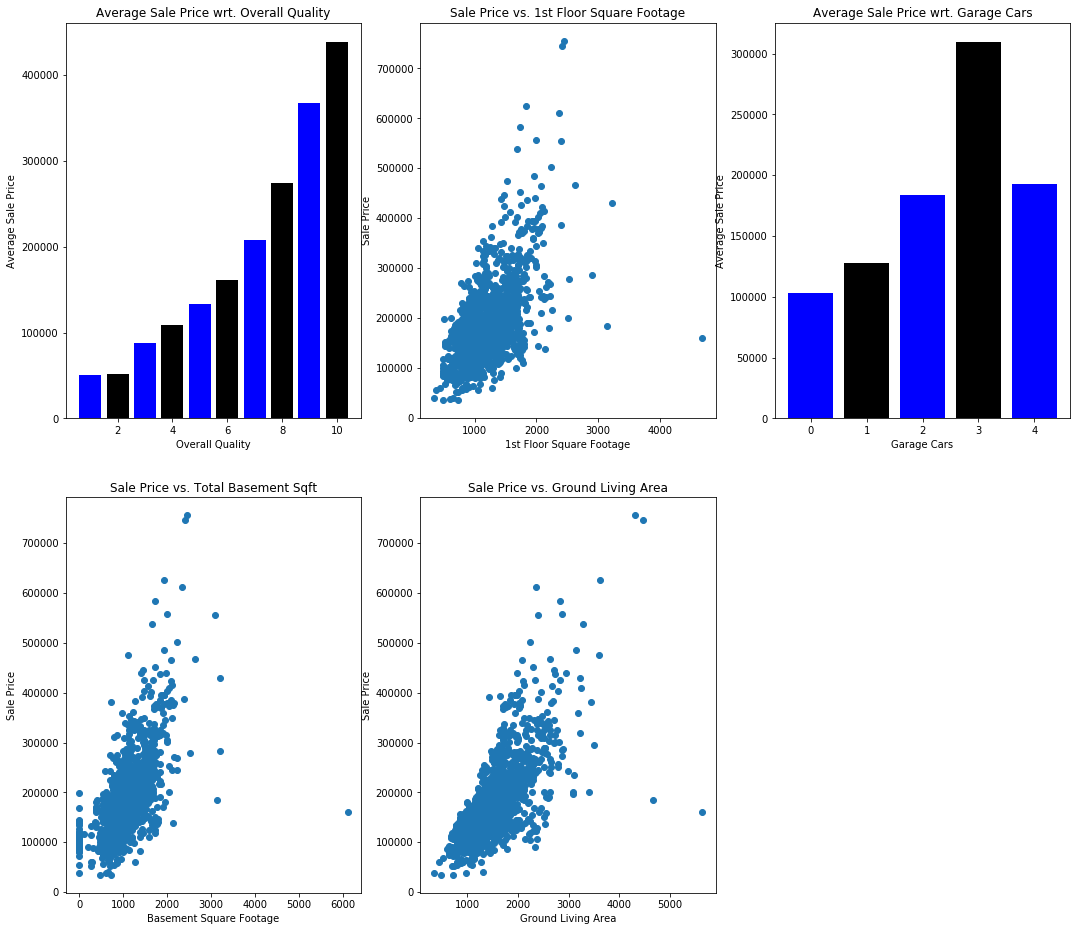

In [22]:
plt.figure(figsize=(18,16))

plt.subplot(2,3,1)
plt.bar(house_df.groupby("OverallQual")["SalePrice"].mean().
           index, house_df.groupby("OverallQual")["SalePrice"].mean(),
       color=("blue","black"))
plt.title("Average Sale Price wrt. Overall Quality")
plt.ylabel("Average Sale Price")
plt.xlabel("Overall Quality")

plt.subplot(2,3,2)
plt.scatter(house_df["1stFlrSF"], house_df["SalePrice"])
plt.title("Sale Price vs. 1st Floor Square Footage")
plt.ylabel("Sale Price")
plt.xlabel("1st Floor Square Footage")

plt.subplot(2,3,3)
plt.bar(house_df.groupby("GarageCars")["SalePrice"].mean().
           index, house_df.groupby("GarageCars")["SalePrice"].mean(),
       color=("blue","black"))
plt.title("Average Sale Price wrt. Garage Cars")
plt.ylabel("Average Sale Price")
plt.xlabel("Garage Cars")

plt.subplot(2,3,4)
plt.scatter(house_df["TotalBsmtSF"], house_df["SalePrice"])
plt.title("Sale Price vs. Total Basement Sqft")
plt.ylabel("Sale Price")
plt.xlabel("Basement Square Footage")

plt.subplot(2,3,5)
plt.scatter(house_df["GrLivArea"], house_df["SalePrice"])
plt.title("Sale Price vs. Ground Living Area")
plt.ylabel("Sale Price")
plt.xlabel("Ground Living Area")

plt.show()

In [24]:
Y = house_df["SalePrice"]
X = house_df[["OverallQual", "1stFlrSF", "GarageCars", "TotalBsmtSF", "GrLivArea"] + dummy_column_names]

X = sm.add_constant(X)

results = sm.OLS(Y,X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     406.5
Date:                Sat, 01 Jun 2019   Prob (F-statistic):               0.00
Time:                        14:11:53   Log-Likelihood:                -17467.
No. Observations:                1460   AIC:                         3.496e+04
Df Residuals:                    1447   BIC:                         3.503e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -1.238e+05   5816.846    -21.290      0.000   -1.35e+05   -1.12e+05
OverallQual        2.428e+04   1079.385     22.491      0.000    2.22e+04    2.64e+04
1stFlrSF            -29.5523      8.409     -3.515      0.000     -46.047     -13.058
GarageCars         1.646e+04   1760.096      9.354      0.000     1.3e+04    1.99e+04
TotalBsmtSF          24.3748      4.290      5.681      0.000      15.959      32.791
GrLivArea            79.0552      6.090     12.982      0.000      67.110      91.000
HouseStyle_1.5Unf  1.713e+04   1.12e+04      1.533      0.125   -4784.166     3.9e+04
HouseStyle_1Story   3.22e+04   5051.738      6.375      0.000    2.23e+04    4.21e+04
HouseStyle_2.5Fin -4.478e+04   1.49e+04     -2.998      0.003   -7.41e+04   -1.55e+04
HouseStyle_2.5Unf -4.348e+04   1.21e+04     -3.596      0.000   -6.72e+04   -1.98e+04
HouseStyle_2Story -3594.2839   4223.441     -0.851      0.395   -1.19e+04    4690.438
HouseStyle_SFoyer  3.379e+04   7685.032      4.397      0.000    1.87e+04    4.89e+04
HouseStyle_SLvl    2.276e+04   6232.400      3.652      0.000    1.05e+04     3.5e+04
==============================================================================
Omnibus:                      416.046   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            32007.362
Skew:                          -0.311   Prob(JB):                         0.00
Kurtosis:                      25.929   Cond. No.                     3.49e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.49e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""